# ***Import Libraries***

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import regex as re
import math

# ***Preprocessing***

### 📊 Initial Data Exploration

The following code loads the dataset and performs the first set of exploratory checks.  
This helps you understand the structure, size, and potential data quality issues.
- **Loads the dataset** from its file path.
- **Displays the first 5 rows** to preview the data.
- Shows the **shape** (number of rows and columns).
- Displays **data types**, memory usage, and non-null counts using `df.info()`.
- Provides **summary statistics** (mean, std, min, max, quartiles) for all numeric columns.
- Counts **missing values** column by column.
- Counts **duplicate rows** to detect redundancy in the dataset.


In [42]:
df= pd.read_csv(r'Datasets/car details v4.csv')
df.head()


,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [43]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (2059, 19)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              1979 non-null   object 
 11  Max Power           1979 non-null   object 
 12  Max Torque          1979 non-null   object 
 13  Drivetrain          1923 non-null   object 
 14  Length              1995 non-null   float64
 15  Width               1995 non-null   float64
 16  Height

In [45]:
df.describe()


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


<Axes: >

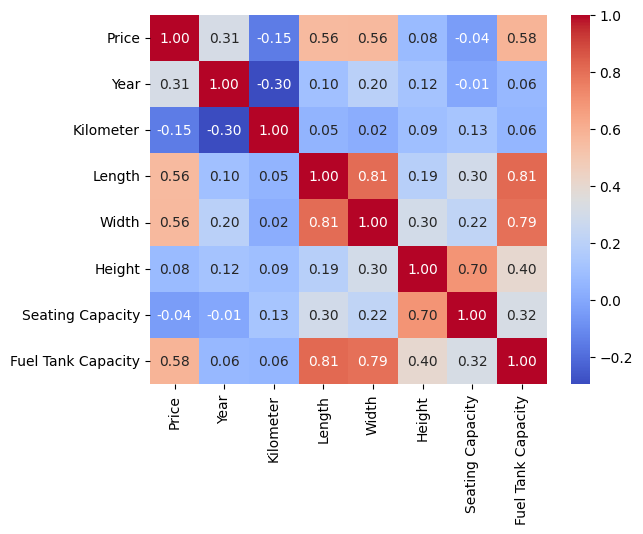

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [47]:
df.isnull().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [48]:
df.duplicated().sum()   

np.int64(1)

### 📌 Data Type Cleaning & Numerical Extraction

The following code cleans several columns by extracting numeric values and converting them into numeric types.  
This is important because many columns contain mixed text–numeric formats such as `"1197 CC"`, `"88.7 bhp"`, or `"200 Nm"`.

- Extracts only the numeric part of string columns using regex.  
- Converts those extracted values into floats for numerical processing.  
- Converts dimension and specification columns to numeric types.  
- Coerces invalid entries into `NaN` so they can be handled during cleaning.  

In [49]:
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype(float)
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Kilometer'] = pd.to_numeric(df['Kilometer'], errors='coerce')
df['Seating Capacity'] = pd.to_numeric(df['Seating Capacity'], errors='coerce')
df['Fuel Tank Capacity'] = pd.to_numeric(df['Fuel Tank Capacity'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')


### 🧹 Handling Missing Values (Numerical & Categorical Columns )

The following code handles missing values in both numerical and categorical columns.  
This step ensures the dataset is fully clean and ready for modeling.
- **Identifies numeric columns** and fills missing values using the **median**,  
  which is robust against outliers and prevents skewing the data.

- **Identifies categorical columns** and fills missing values using the **mode**  
  (the most frequent category), which is the standard approach for handling missing text labels.

- Ensures **no NaN values remain**, making the dataset usable for ML models that cannot handle missing data.


In [50]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              2059 non-null   float64
 11  Max Power           2059 non-null   float64
 12  Max Torque          2059 non-null   float64
 13  Drivetrain          2059 non-null   object 
 14  Length              2059 non-null   float64
 15  Width               2059 non-null   float64
 16  Height

### 🚫 Outlier Detection & Removal (IQR Method)
The following code identifies and removes outliers using the **Interquartile Range (IQR)** and **Z-Score** method.  
This ensures the dataset is free from extreme values that can negatively impact modeling.
- Detects outliers in key technical and pricing columns using IQR.
- Removes values far outside normal ranges.
- Ensures **years**, **engine sizes**, **power**, **seating capacity**, and **kilometers driven** stay realistic.
- Improves model performance by reducing noise and extreme deviations.



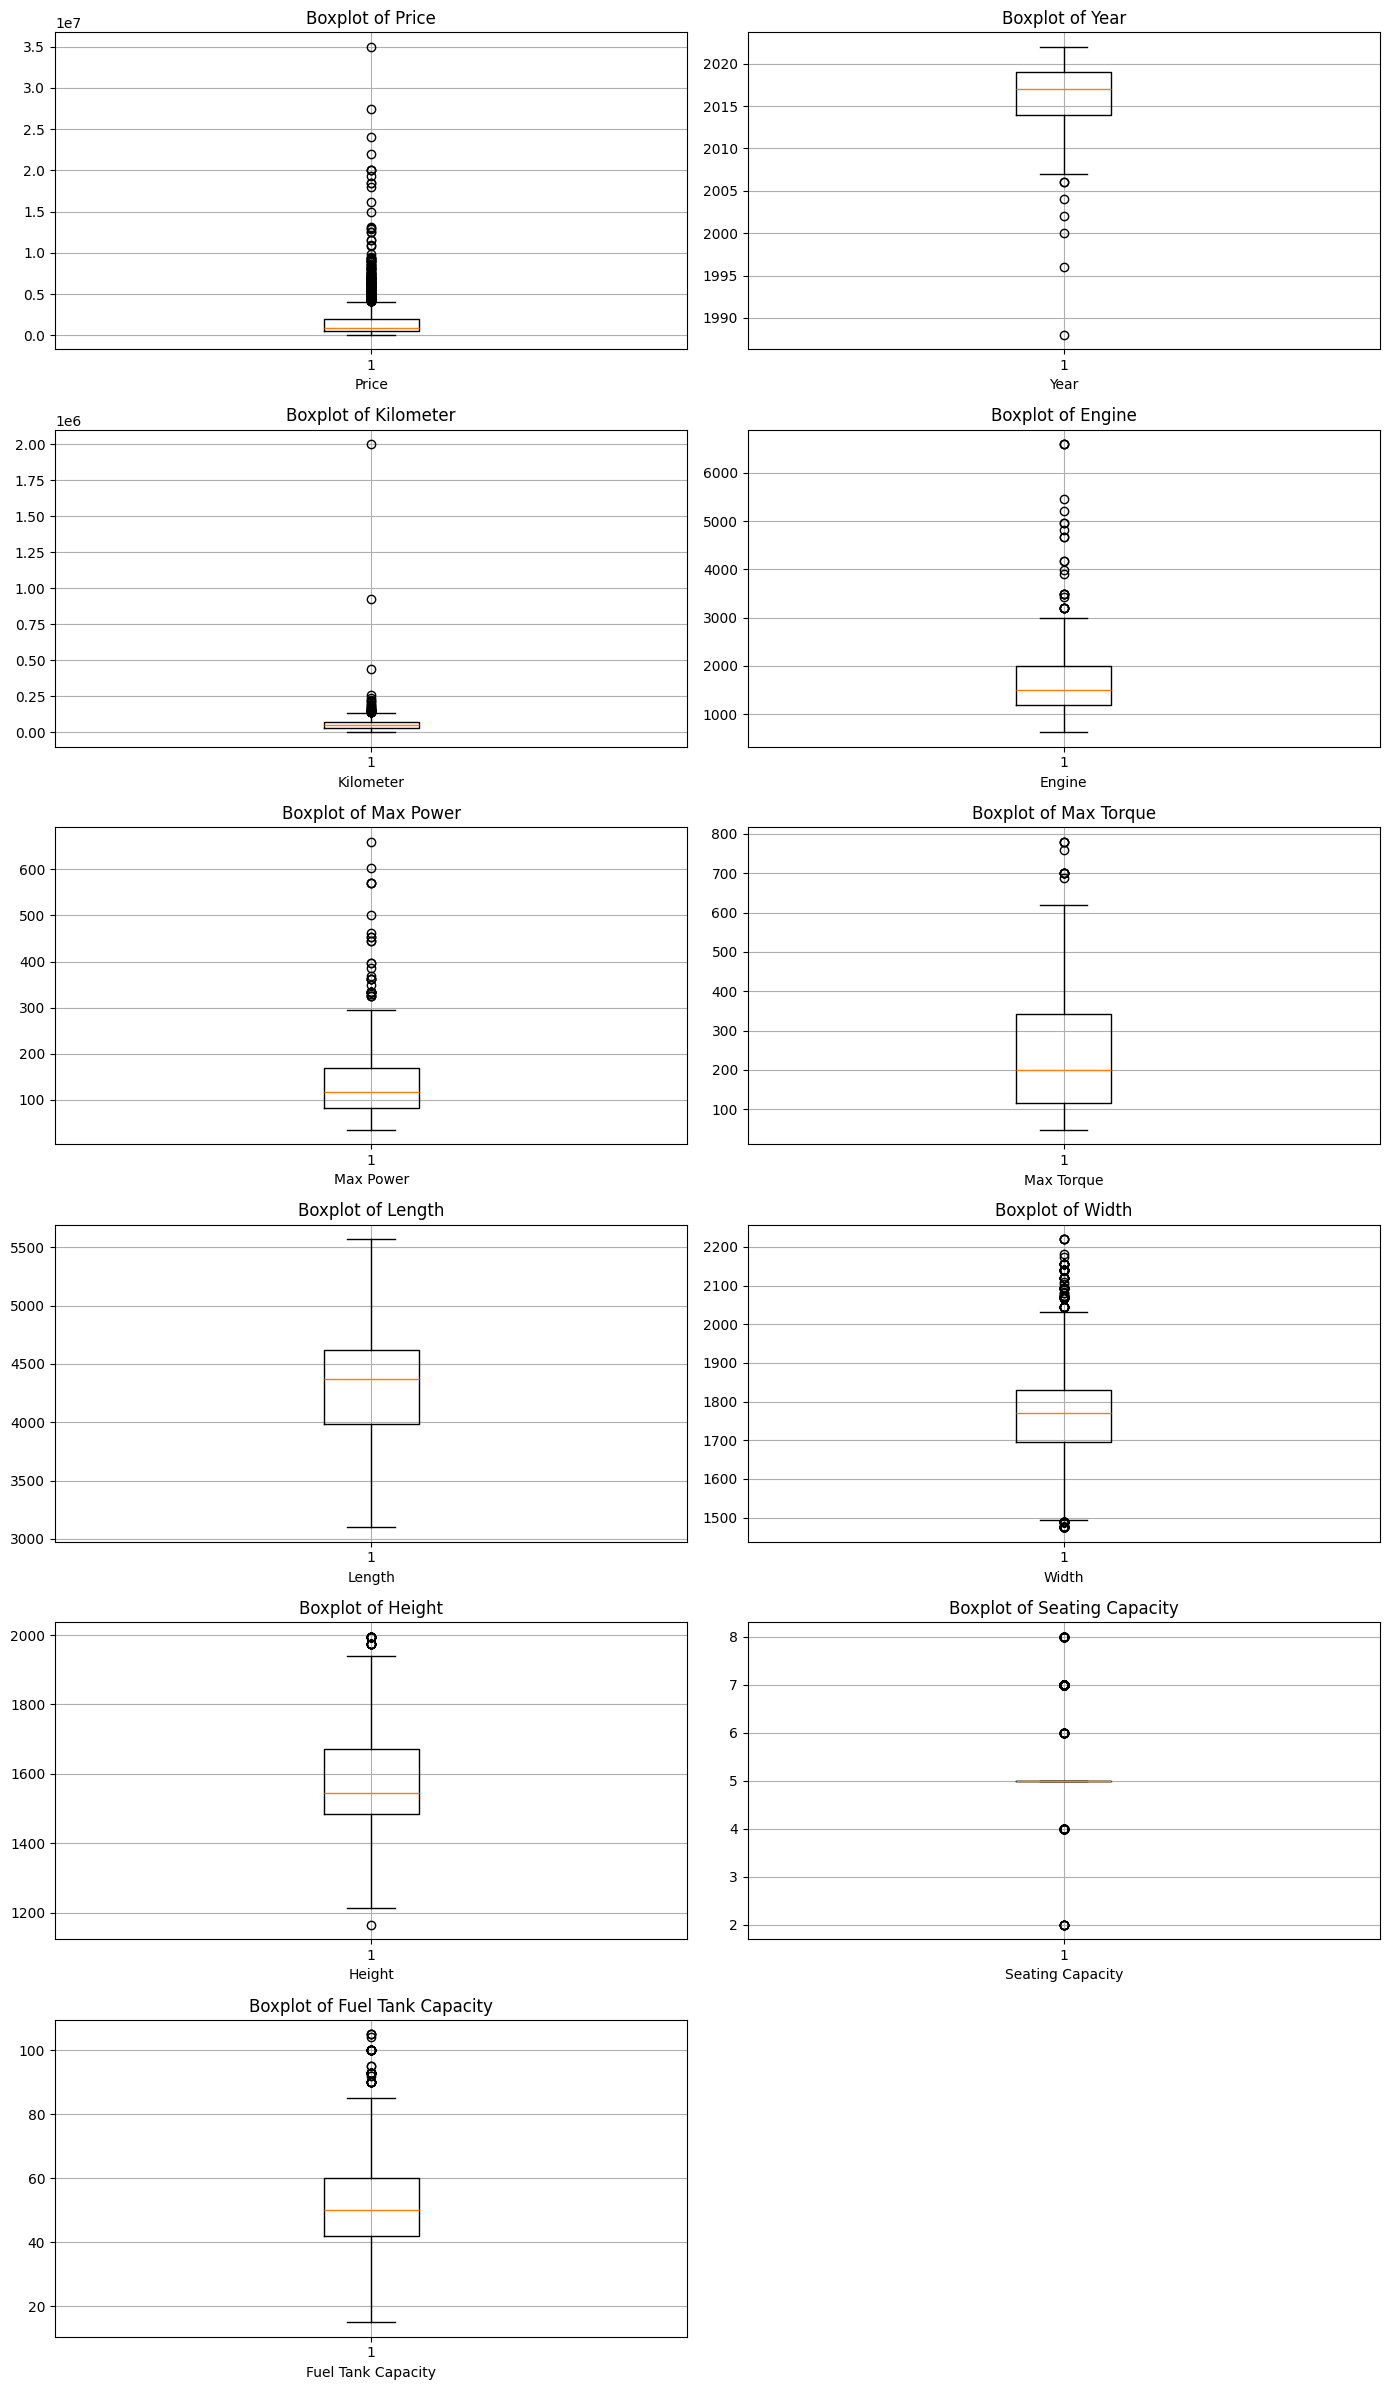

In [52]:
n = len(num_cols)
rows = math.ceil(n / 2)
cols = 2
plt.figure(figsize=(14, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [54]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df = remove_outliers(df, col)

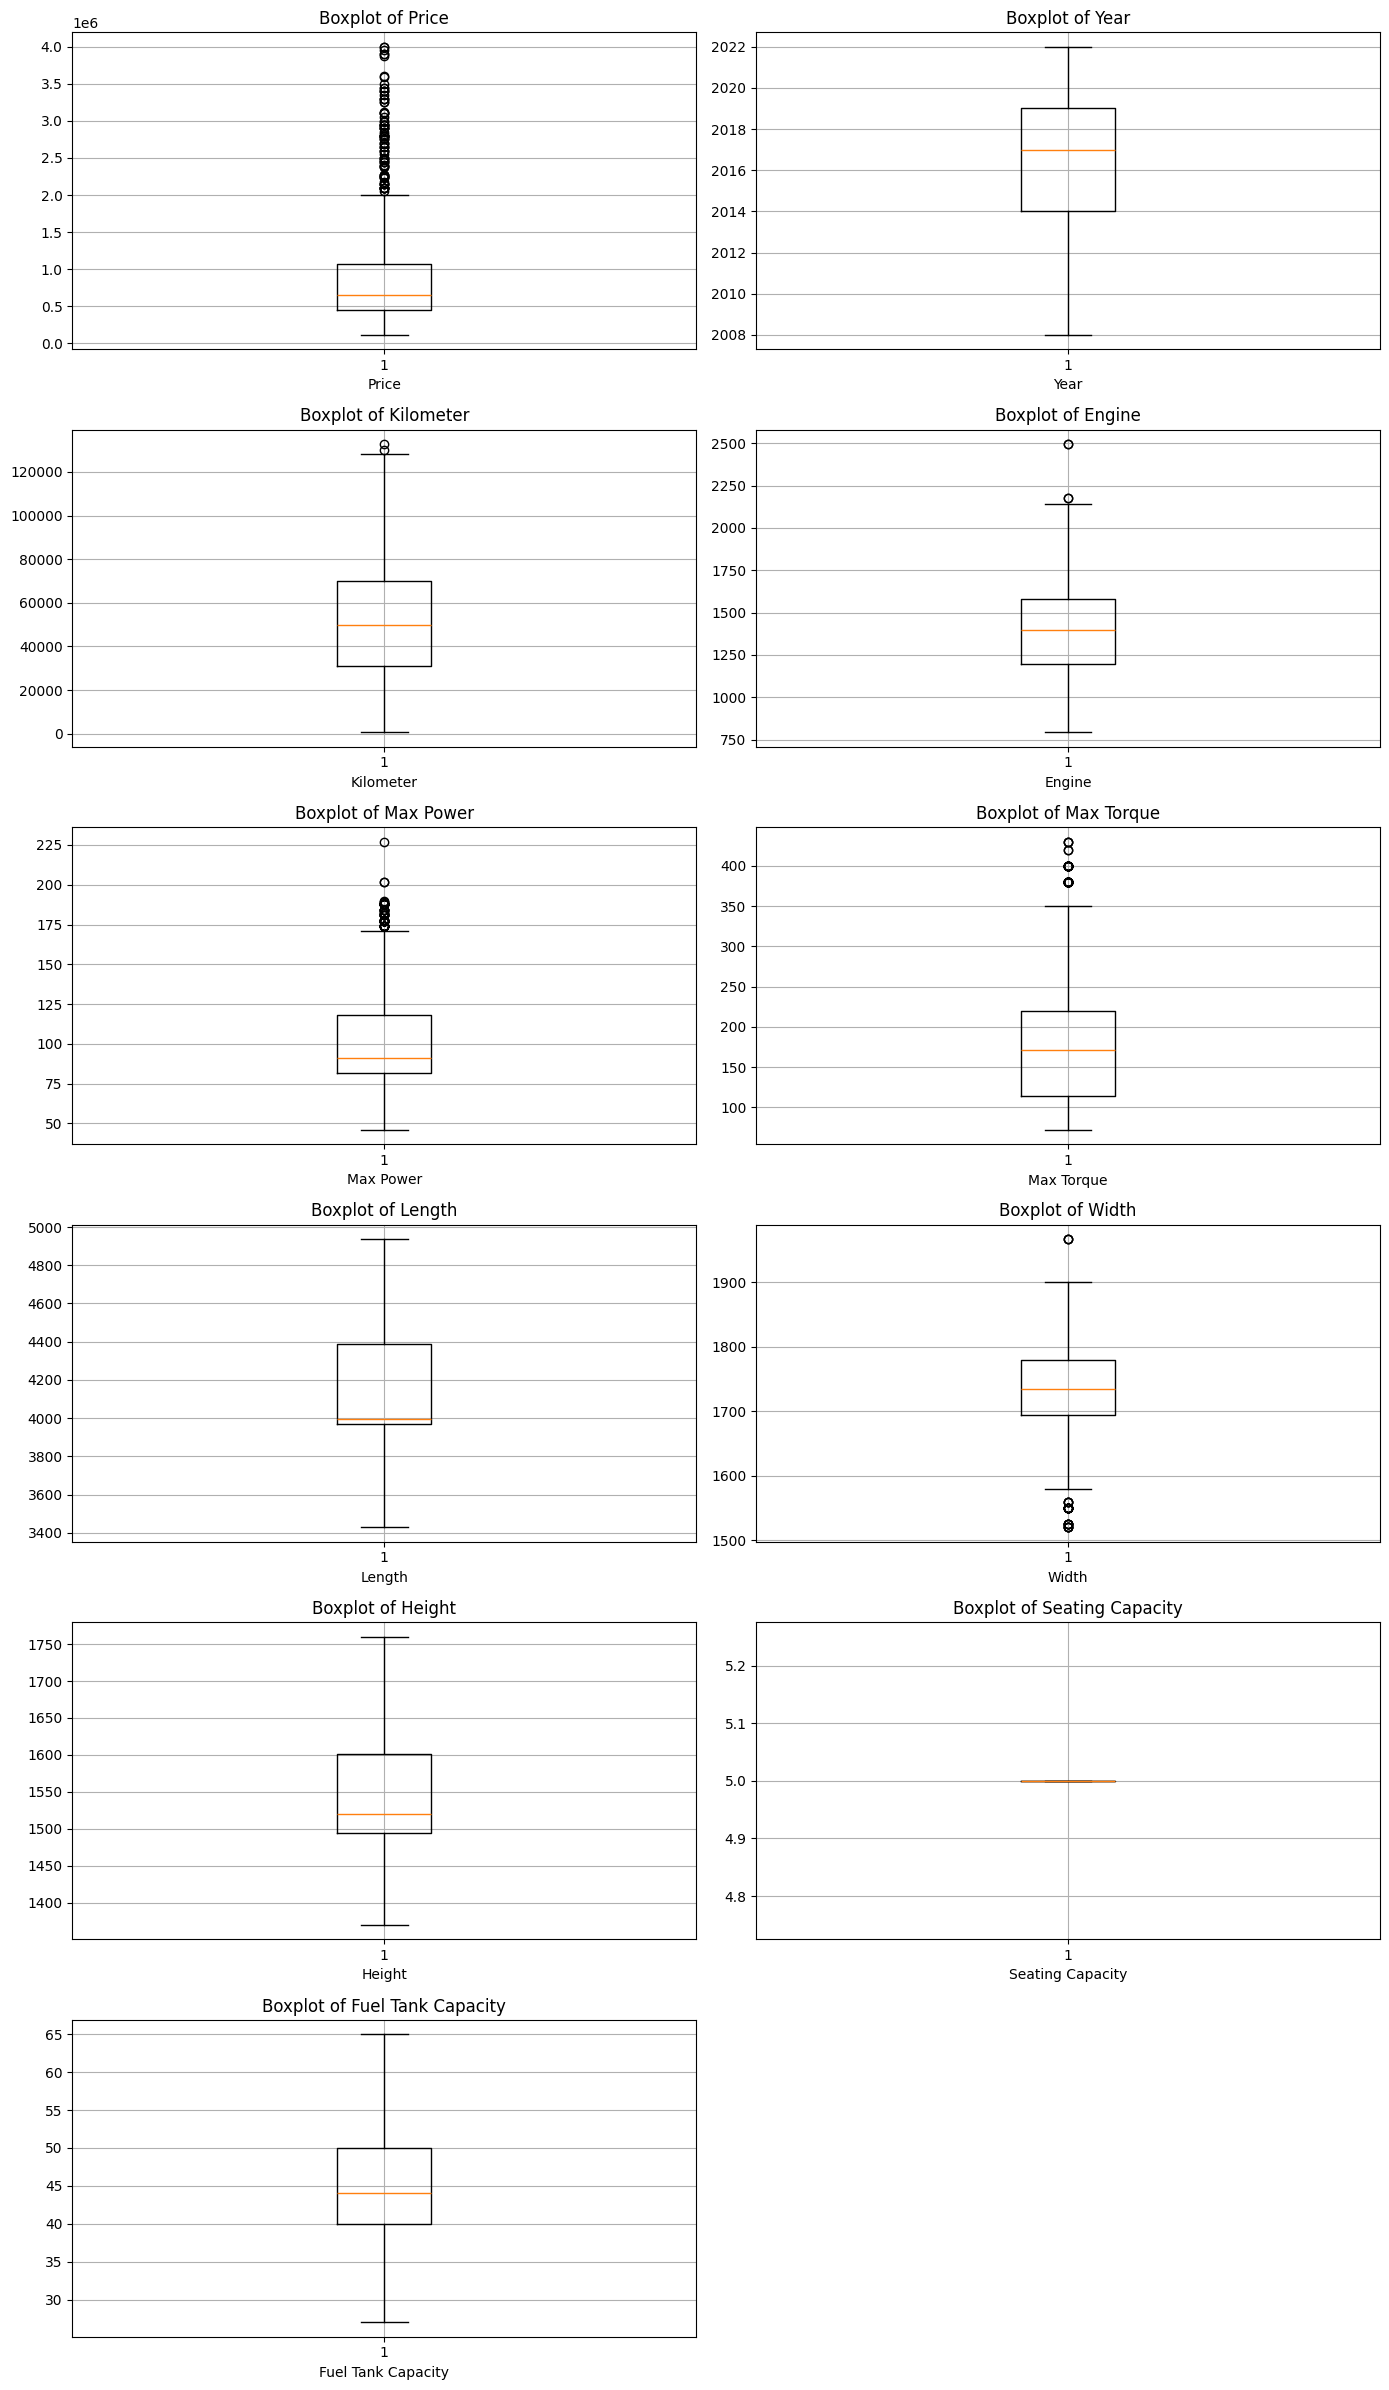

In [55]:
n = len(num_cols)
rows = math.ceil(n / 2)
cols = 2
plt.figure(figsize=(14, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

## 🔧 Data Preprocessing, Encoding, and Scaling

In this step, we prepare the dataset for machine learning by handling missing values, encoding categorical variables, and scaling numerical features.

### **1. Encoding Categorical Variables**
Since machine learning models require numerical input, all categorical columns are converted into numbers using appropriate encoding techniques:
- **One-Hot Encoding** for nominal (non-ordered) categories.
- **Label Encoding** or **Ordinal Encoding** for ordered categories if needed.

### **2. Feature Scaling**
To ensure all numerical features contribute equally to the model:
- **StandardScaler** is applied to transform values to a standard normal distribution (mean = 0, std = 1).
- Scaling prevents features with large ranges from dominating the model training.


In [56]:
features = df.drop(columns='Price').columns.tolist()
target = 'Price'
X = df[features].copy()
X = X.apply(pd.to_numeric, errors='ignore')  
y = np.log1p(df[target].astype(float))

C:\Users\dell\AppData\Local\Temp\ipykernel_19296\2318913199.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


In [57]:
mapping_dict = {
    'Transmission': {'Manual': 0, 'Automatic': 1},
    'Fuel Type': {'Petrol': 0, 'Diesel': 1, 'Hybrid': 2},
    'Drivetrain': {'FWD': 0, 'RWD': 1, 'AWD': 2}
}
final_cols =  X.select_dtypes(include=['number']).columns.tolist()

for col, mapping in mapping_dict.items():
    if col in X.columns:
        new_col = f"{col}_num"
        X[new_col] = X[col].map(mapping)

        X[new_col].fillna(X[new_col].mode()[0], inplace=True)
        final_cols.append(new_col)  # add to final feature list

X_final = X[final_cols].astype(float)

display(X_final.head(5))


C:\Users\dell\AppData\Local\Temp\ipykernel_19296\2001610053.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[new_col].fillna(X[new_col].mode()[0], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_19296\2001610053.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,Year,Kilometer,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Transmission_num,Fuel Type_num,Drivetrain_num
0,2017.0,87150.0,1198.0,87.0,109.0000,3990.0,1680.0,1505.0,5.0,35.0,0.0,0.0,0.0
1,2014.0,75000.0,1248.0,74.0,190.0000,3995.0,1695.0,1555.0,5.0,42.0,0.0,1.0,0.0
2,2011.0,67000.0,1197.0,79.0,112.7619,3585.0,1595.0,1550.0,5.0,35.0,0.0,0.0,0.0
3,2019.0,37500.0,1197.0,82.0,113.0000,3995.0,1745.0,1510.0,5.0,37.0,0.0,0.0,0.0
5,2017.0,73315.0,1373.0,91.0,130.0000,4490.0,1730.0,1485.0,5.0,43.0,0.0,0.0,0.0


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Store list of unencoded data
num_cols = [
    'Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque',
    'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity'
]

# Encoded columns
cat_cols = [
    'Transmission_num', 'Fuel Type_num', 'Drivetrain_num'
]

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', 'passthrough', cat_cols)
    ]
)

# Fit and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# ***Modeling***

In [63]:
# Create linear regression instance
model = LinearRegression()

# Fit into data
model.fit(X_train_processed, y_train)

# Predict price
y_pred = model.predict(X_test_processed)

# Back to original scale
y_pred_orig = np.expm1(y_pred)
y_test_orig = np.expm1(y_test)

# Get score parameter
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print score parameter
print("Linear Regression results:")
print(f"R²: {r2:.4f}")
print(f"RMSE (log scale): {rmse:.4f}")
print(f"RMSE / mean price (original scale): {rmse / np.mean(y_test):.4f}")

print(f"\nExample Real Price vs Predicted:")
comparison_df = pd.DataFrame({'Actual': y_test_orig, 'Predicted': y_pred_orig})
print(comparison_df.head(5))

Linear Regression results:
R²: 0.8811
RMSE (log scale): 0.2270
RMSE / mean price (original scale): 0.0169

Example Real Price vs Predicted:
         Actual     Predicted
1280   800000.0  7.612846e+05
1908   775000.0  8.037458e+05
1116  1340000.0  1.428852e+06
719    745000.0  6.507184e+05
1213  1625000.0  1.467240e+06


In [ ]:
# Create instance form random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the scaled training data
rf_model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print scores
print("Random Forest Regression Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE (Log Scale): {rf_rmse:.4f}")

# Optional: Convert predictions back to original price scale (Rupees) for a reality check
# Since we used np.log1p() earlier, we use np.expm1() to reverse it
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_rf)

# Display table for comparison
print(f"\nExample Real Price vs Predicted:")
comparison_df = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
print(comparison_df.head(5))

Random Forest Regression Results:
R² Score: 0.9308
RMSE (Log Scale): 0.1732

Example Real Price vs Predicted:
         Actual     Predicted
1280   800000.0  8.292472e+05
1908   775000.0  8.069394e+05
1116  1340000.0  1.335807e+06
719    745000.0  5.448381e+05
1213  1625000.0  1.616257e+06


# ***Comparison***

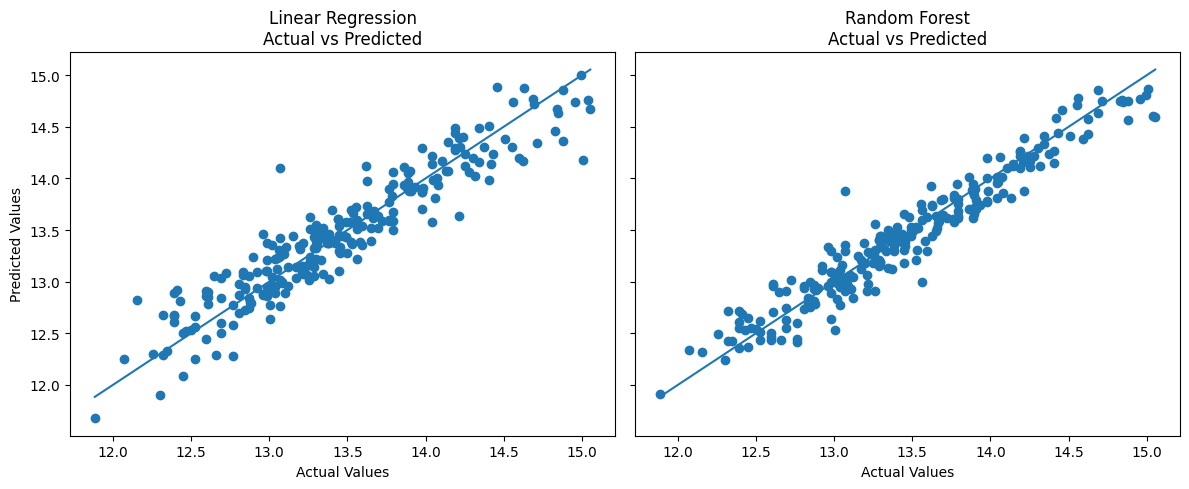

In [ ]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# ----- Linear Regression -----
axes[0].scatter(y_test, y_pred)
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
axes[0].set_title("Linear Regression\nActual vs Predicted")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# ----- Random Forest -----
axes[1].scatter(y_test, y_pred_rf)
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
axes[1].set_title("Random Forest\nActual vs Predicted")
axes[1].set_xlabel("Actual Values")

# Display plots
plt.tight_layout()
plt.show()

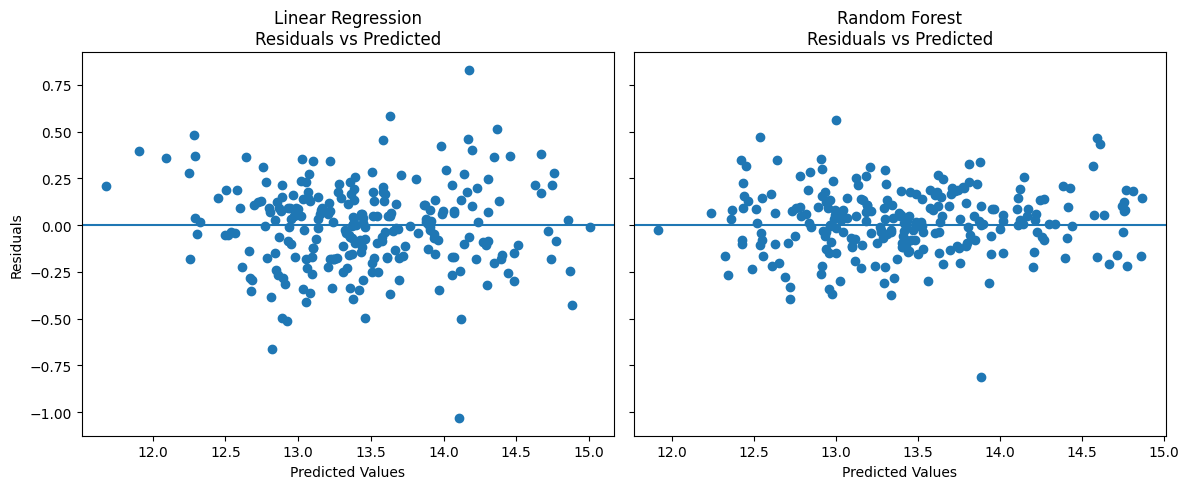

In [70]:
residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ----- Linear Regression -----
axes[0].scatter(y_pred, residuals_lr)
axes[0].axhline(0)
axes[0].set_title("Linear Regression\nResiduals vs Predicted")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# ----- Random Forest -----
axes[1].scatter(y_pred_rf, residuals_rf)
axes[1].axhline(0)
axes[1].set_title("Random Forest\nResiduals vs Predicted")
axes[1].set_xlabel("Predicted Values")

plt.tight_layout()
plt.show()

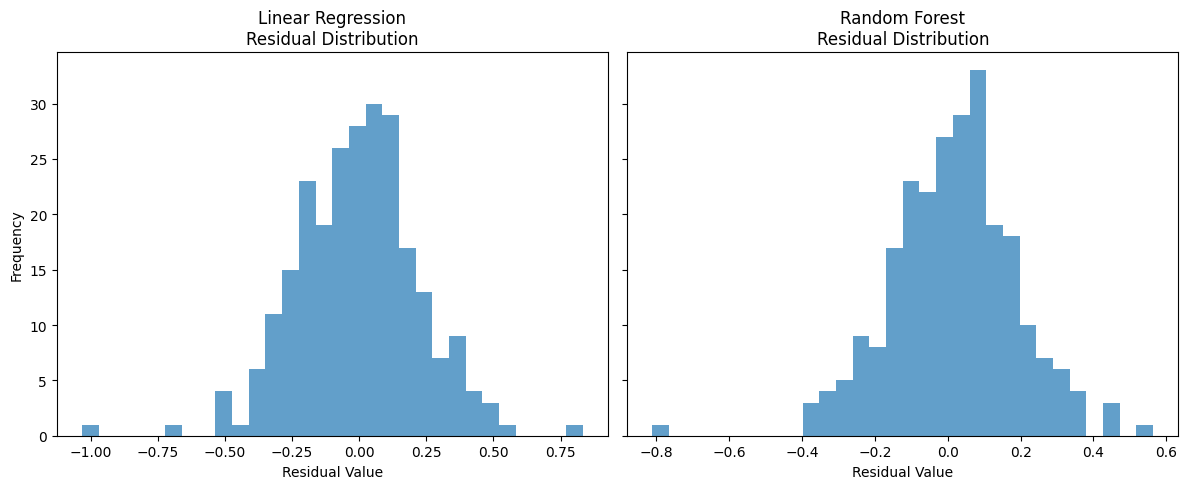

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ----- Linear Regression -----
axes[0].hist(residuals_lr, bins=30, alpha=0.7)
axes[0].set_title("Linear Regression\nResidual Distribution")
axes[0].set_xlabel("Residual Value")
axes[0].set_ylabel("Frequency")

# ----- Random Forest -----
axes[1].hist(residuals_rf, bins=30, alpha=0.7)
axes[1].set_title("Random Forest\nResidual Distribution")
axes[1].set_xlabel("Residual Value")

plt.tight_layout()
plt.show()

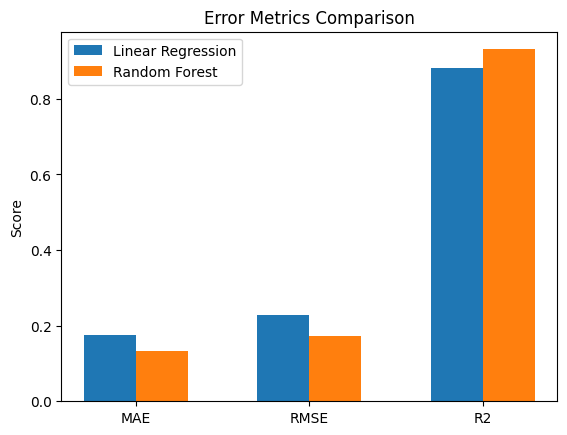

In [ ]:
# Score matrix
metrics = ["MAE", "RMSE", "R2"]

# Scores for LinearRegression
lr_scores = [
    mean_absolute_error(y_test, y_pred),
    np.sqrt(mean_squared_error(y_test, y_pred)),
    r2_score(y_test, y_pred)
]

# Scores for RandomForest
rf_scores = [
    mean_absolute_error(y_test, y_pred_rf),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    r2_score(y_test, y_pred_rf)
]

# Create indexes by arange function
x = np.arange(len(metrics))

# Create chart
plt.figure()
plt.bar(x - 0.15, lr_scores, width=0.3)
plt.bar(x + 0.15, rf_scores, width=0.3)
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Error Metrics Comparison")
plt.legend(["Linear Regression", "Random Forest"])
plt.show()

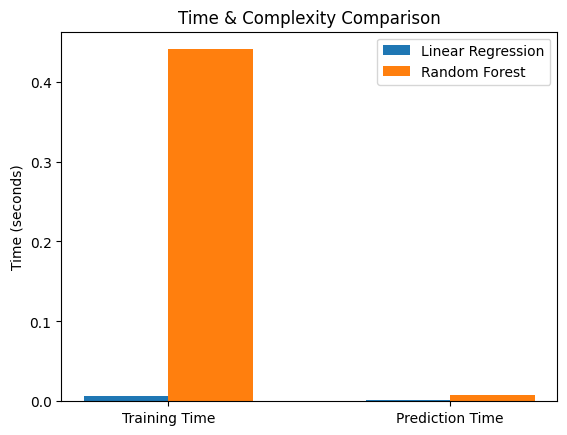

In [ ]:
import time

# Measure training time for LinearRegression
start = time.time()
lr = LinearRegression().fit(X_train, y_train)
lr_train_time = time.time() - start

# Measure training time for RandomForest
start = time.time()
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_train_time = time.time() - start

# Measure prediction time for LinearRegression
start = time.time()
lr.predict(X_test)
lr_pred_time = time.time() - start

# Measure prediction time for RandomForest
start = time.time()
rf.predict(X_test)
rf_pred_time = time.time() - start

# Create parameter for chart
labels = ["Training Time", "Prediction Time"]
lr_times = [lr_train_time, lr_pred_time]
rf_times = [rf_train_time, rf_pred_time]

# Create indexes using arange
x = np.arange(len(labels))

# Create chart
plt.figure()
plt.bar(x - 0.15, lr_times, width=0.3)
plt.bar(x + 0.15, rf_times, width=0.3)
plt.xticks(x, labels)
plt.ylabel("Time (seconds)")
plt.title("Time & Complexity Comparison")
plt.legend(["Linear Regression", "Random Forest"])
plt.show()
